# Zomato Data Analysis

## The objective of analysing the dataset is to answer some business questions based on historical data. Here EDA techique is used. By using descriptive statistics and visualisation techniques, in depth analysis of different features are developed. The common business questions which are answered in this notebooks are:

#### 1.   Find the number of Restaurents delivering online based on location and how many are not having online deliver facility?
#### 2.   How many restaurents are allowing table booking?Find out comparison between number of restaurents having facility to                    book table online and not having this facility?   
#### 3.   Which city is ahead in terms of most number of restaurents?
#### 4.   Does user's rating get affected due to different location?
#### 5.   How many common restaurent types are there around the city? Which types are having maximum counts and which are                    the least?
#### 6.   What is the normal tendency of user's rating?
#### 7.   Does user's rating depend on different restaurent types?
#### 8.   How costing depends on different types of restaurent?
#### 9.   How user's rating varies with costing?
#### 10. What is generally user's preference for spending to have lunch/dinner around the city?
#### 11. Find out most number of outlets of a particular restaurent.

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Reading csv data

In [2]:
#loading dataset
zomato=pd.read_csv("zomato.csv")
zomato.head() #displaying first 5 records

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
row,columns=zomato.shape
print(f" Total number of rows and columns are respectively {row}, {columns}" )

 Total number of rows and columns are respectively 51717, 17


In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

        Missing values are available in large quantities

In [5]:
#dropping irrelevant columns
zomato.drop(["url","phone"], axis=1, inplace=True)
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
#dropping duplicates
zomato[zomato.duplicated()].shape #Duplicates-repeated data/same data

(43, 15)

In [7]:
zomato.drop_duplicates(inplace=True)

In [8]:
zomato.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7767
votes                              0
location                          21
rest_type                        227
dish_liked                     28047
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

        This represents availability of NaN values in each column

In [9]:
zomato.dropna(how="any",inplace=True)

In [10]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23395 non-null  object
 1   name                         23395 non-null  object
 2   online_order                 23395 non-null  object
 3   book_table                   23395 non-null  object
 4   rate                         23395 non-null  object
 5   votes                        23395 non-null  int64 
 6   location                     23395 non-null  object
 7   rest_type                    23395 non-null  object
 8   dish_liked                   23395 non-null  object
 9   cuisines                     23395 non-null  object
 10  approx_cost(for two people)  23395 non-null  object
 11  reviews_list                 23395 non-null  object
 12  menu_item                    23395 non-null  object
 13  listed_in(type)              23

In [11]:
zomato.columns #shows all the features

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
#renamng columns with relevant names
zomato=zomato.rename(columns={"approx_cost(for two people)":"cost",'listed_in(city)':"city","listed_in(type)":"type"})

In [13]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
zomato.cost.unique() #this displays all the unique values in the series

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [15]:
zomato.cost=zomato.cost.transform(lambda x: str(x.replace(",","")))
#this replaces all "," with no space

In [16]:
#Cross checking 
zomato.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [17]:
#Changing to numeric form
zomato.cost=pd.to_numeric(zomato.cost)

In [18]:
#cross checking the datatype
zomato.cost.dtype

dtype('int64')

In [19]:
zomato.rate.unique()
#we want to get rid of unwanted characters such as "/5" and "NEW"

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
#Replacing unwanted characters with blank space
zomato.rate=zomato.rate.transform(lambda x: str(x.replace("/5","").replace("NEW","")))
#converting to numeric data type
zomato.rate=pd.to_numeric(zomato.rate)

In [21]:
zomato.name=zomato.name.apply(lambda x: x.title())

In [22]:
#Conerting "Yes" , "No" with boolean data for better computaion
zomato.online_order=zomato.online_order.replace(("Yes","No"),(True,False))
zomato.book_table.replace(("Yes","No"),(True,False), inplace=True)

In [23]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [24]:
zomato.isnull().sum()

address           0
name              0
online_order      0
book_table        0
rate            147
votes             0
location          0
rest_type         0
dish_liked        0
cuisines          0
cost              0
reviews_list      0
menu_item         0
type              0
city              0
dtype: int64

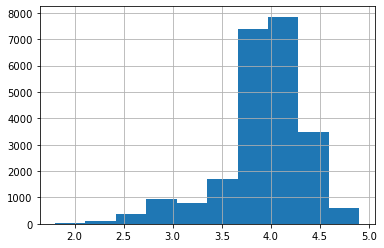

In [25]:
#plotting histogram to check the skewness of the series
zomato.rate.hist()
#The distribution is left skewed and 

In [26]:
print("The mean rate is:",zomato.rate.mean())
print("The median rate is:",zomato.rate.median())


The mean rate is: 3.9057811424638555
The median rate is: 4.0


        OBSERVATION:
                        1. Mean is lesser than median
                        2. Distribution is left skewed
        Conclusion:
                        1.As the data is left skewed and median>mean and also the type of data is discrete 
                          hence to fill NaN values median is a better choice than mean

In [27]:
#Filling missing values with median and storing it in to original one by using inplace=True
zomato.rate.fillna(zomato.rate.median(),inplace=True)

In [28]:
zomato.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

##### Data cleaning is done

###### QS 1. Find the number of Restaurents delivering online based on location and how many are not having online deliver facility?

Ideology-
            
            1. To answer this question let's make two Dataframe with condition like restaurents delivering online
               & other one not delivering online.
            2. After creating the dataframes, we will plot chart with this two dataframe on single figure to check
               which data frame is having maximum counts based on location
            3. To find out location based data, we are using groupby on city

In [29]:
#crating dataframe with condition restaurents haaving no facility for online order
#groupby based on city is done to take all location into consideration 
#count gives the total number of records available based on each category which is here location
not_delivered=zomato[zomato["online_order"]==False].groupby("city").count()
not_delivered

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
city,,,,,,,,,,,,,,
BTM,342,342,342,342,342,342,342,342,342,342,342,342,342,342
Banashankari,82,82,82,82,82,82,82,82,82,82,82,82,82,82
Bannerghatta Road,132,132,132,132,132,132,132,132,132,132,132,132,132,132
Basavanagudi,152,152,152,152,152,152,152,152,152,152,152,152,152,152
Bellandur,112,112,112,112,112,112,112,112,112,112,112,112,112,112
Brigade Road,408,408,408,408,408,408,408,408,408,408,408,408,408,408
Brookefield,136,136,136,136,136,136,136,136,136,136,136,136,136,136
Church Street,430,430,430,430,430,430,430,430,430,430,430,430,430,430
Electronic City,98,98,98,98,98,98,98,98,98,98,98,98,98,98


In [30]:
#crating dataframe with condition restaurents haaving facility for online order
#groupby based on city is done to take all location into consideration 
#count gives the total number of records available based on each category which is here location
delivered= zomato[zomato["online_order"]==True].groupby("city").count()
delivered["online_order"]

city
BTM                      1094
Banashankari              291
Bannerghatta Road         418
Basavanagudi              454
Bellandur                 396
Brigade Road              562
Brookefield               464
Church Street             552
Electronic City           227
Frazer Town               422
HSR                       607
Indiranagar               660
JP Nagar                  630
Jayanagar                 827
Kalyan Nagar              406
Kammanahalli              410
Koramangala 4th Block    1007
Koramangala 5th Block     963
Koramangala 6th Block     927
Koramangala 7th Block     994
Lavelle Road              491
MG Road                   577
Malleshwaram              343
Marathahalli              462
New BEL Road              217
Old Airport Road          508
Rajajinagar               249
Residency Road            454
Sarjapur Road             382
Whitefield                445
Name: online_order, dtype: int64

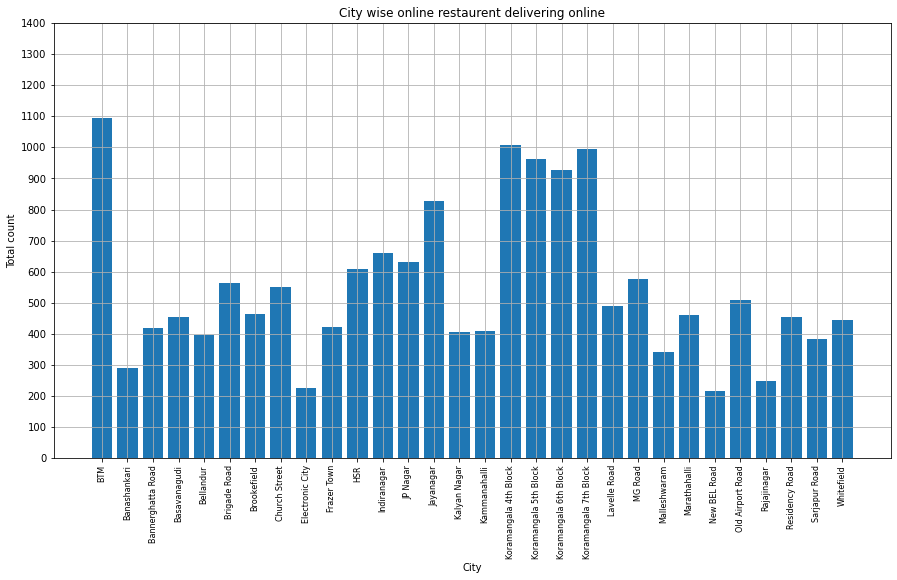

In [31]:
#plotting separate chart based on two newly created dataframes such as 1.delivered and 2.not_delivered
city=[city[0] for city in zomato[zomato["online_order"]==True].groupby("city")]
plt.figure(figsize=(15,8))
plt.bar(city,delivered["online_order"])
plt.grid()
plt.xlabel("City")
plt.ylabel("Total count")
plt.title("City wise online restaurent delivering online")
plt.xticks(city,rotation="vertical", size=8)
plt.yticks(np.arange(0,1500,100))
plt.show()

OBSERVATION-

            1. Most restaurents in BTM allows online order facility followed by Koramangla 4th block.
            2. By looking at the plot it can be observed that enitre Koramangla is having lot of restaurents which
               supports online order facility
            2. New BEL road and Electronic city is having least number of restaurents which supports online order
               facility

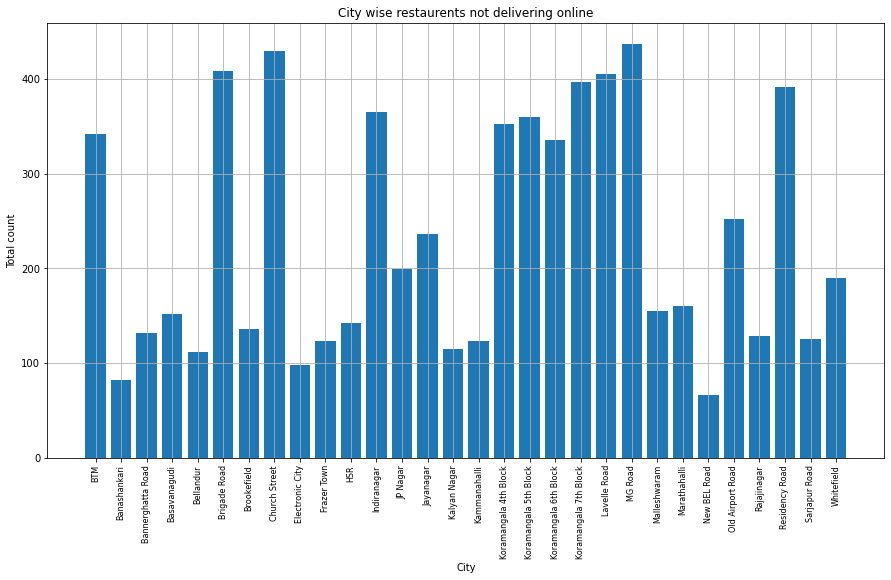

In [32]:
city1=[city[0] for city in zomato[zomato["online_order"]==False].groupby("city")]
plt.figure(figsize=(15,8))
plt.bar(city1,not_delivered["online_order"])
plt.xlabel("City")
plt.grid()
plt.ylabel("Total count")
plt.title("City wise restaurents not delivering online")
plt.xticks(city1,rotation="vertical", size=8)
plt.yticks(np.arange(0,500,100))
plt.show()

OBSERVATION-

            1. Most restaurents in MG road does not allow online order facility followed by Church street and 
            Brigade road
            2. New BEL road is having least number of restaurents which does not supports online order facility

By going through both the plot above exact comparison can not be found untill and unless we can plot both the data
in single chart. Hence to get exact comparison based on numbers or percentage we are plotting both the data
in single bar chart

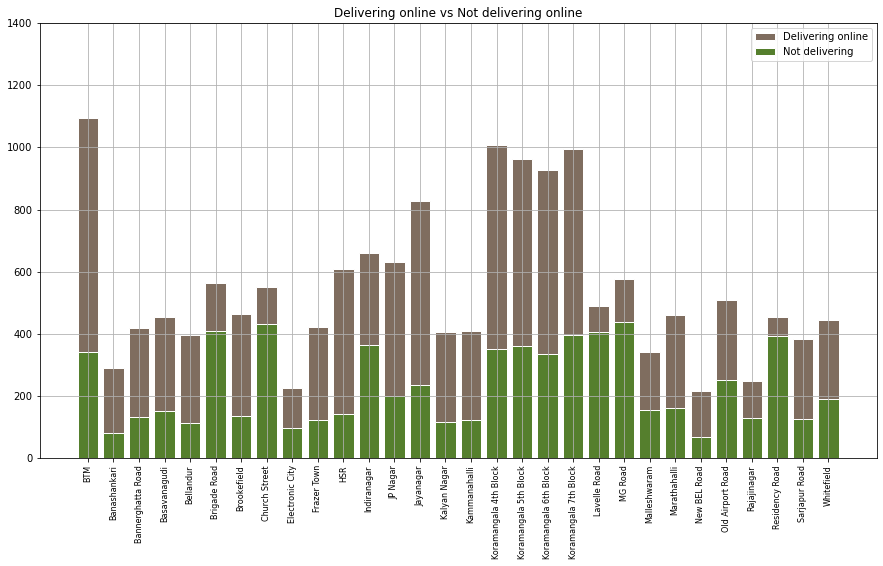

In [33]:
#Merging above two charts and plotting in single bar plot
plt.figure(figsize=(15,8))
plt.bar(city,delivered["online_order"] , color='#7f6d5f',edgecolor='white', label='Delivering online')
plt.bar(city1,not_delivered["online_order"] , color='#557f2d',edgecolor='white', label='Not delivering')
plt.xticks(city,rotation="vertical", size=8)
plt.grid()
plt.yticks(np.arange(0,1500,200))
plt.legend()
plt.title("Delivering online vs Not delivering online")
plt.show()

OBSERVATION: 
            
            1. In terms of numbers, in BTM more than 70% restaurents supports online order facility over the total 
               numbers
            2. Things are very different for Residency road where the facility is available for more or less 50-55%
               of total number of restaurents and rest restaurents are not having the facility. The difference is
               close enough
            3. By looking at the chart one thing is very clear that overall most of the restaurents support
               online facility whereas some doesn't. But the ratio for online_order_available: not_available is
               normally varrying in between 60:40 to 70:30 in most of the times 
               

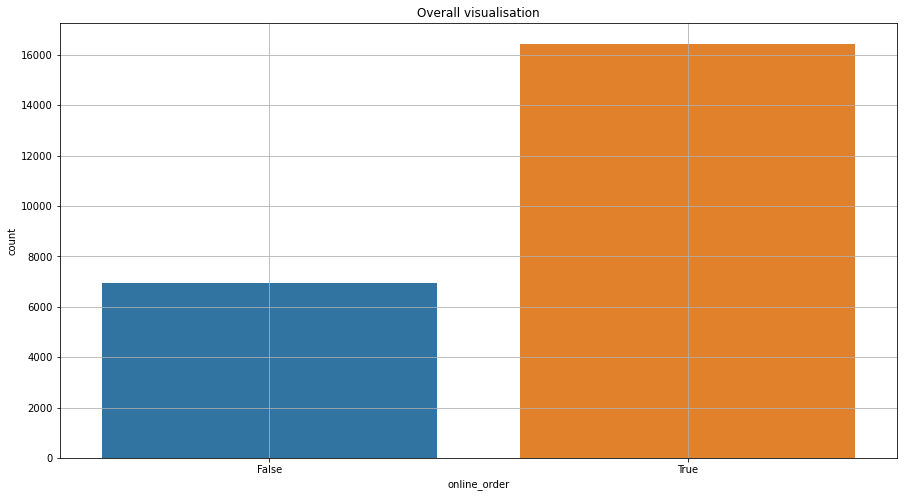

In [34]:
# Entire wise restaurents delivering online and not delivering onlline comparison
plt.figure(figsize=(15,8))
sns.countplot(zomato.online_order)
plt.title("Overall visualisation")
plt.grid()
plt.show()

OBSERVATION: 

            1. Here also we can see that the numbers having online order facility is way more ahead than the 
               numbers having not such facility
            2. As per the previous conclusion here also we can conclude that the number of restaurents having 
               online order facility is almost 250% more than the number of restaurents not having such facility

#### QS 2.  How many restaurents are allowing table booking? Find out comparison between number of restaurents having facility to book table online and not having this facility?

Ideology-

            1. To answer this question let's make two Dataframe with condition like restaurents allowing table
               booking and other one based on restaurents not allowing table booking
            2. After creating the dataframes, we will plot chart with this two dataframe on single figure to check
               which data frame is having maximum counts based on location
            3. To find out location based data, we are using groupby on city

In [35]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


###### Overall

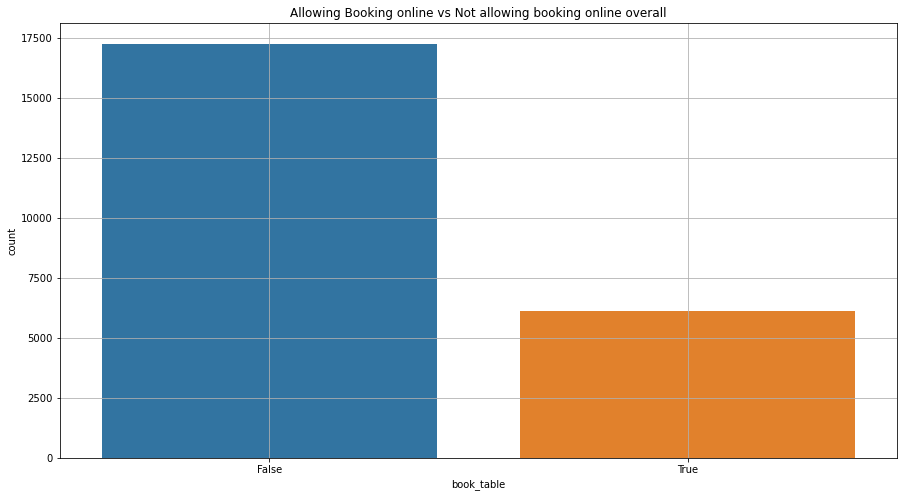

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(zomato.book_table)
plt.title("Allowing Booking online vs Not allowing booking online overall")
plt.grid()
plt.show()

OBSERVATION-

            1. It can be easily seen that in Bangalore most of the restaurents are not allowing table booking 
               The reason behind it can be obvious as in peak time all the restaurents may encounter huge rush of 
               customers and accoridingly if someone books a table and later on doesn't come in time, the authority
               may suffer loss. 
            2. The number's for restaurents not allowing table booking is very large n numbers in terms of 
               restaurents allowing table booking

In [37]:
#creating a dataframe with condition like restaurents allowing table boooking based on location
booked=zomato[zomato["book_table"]==True].groupby("city").count()
#creating a dataframe with condition like restaurents not allowing table boooking based on location
not_booked=zomato[zomato["book_table"]==False].groupby("city").count()

In [38]:
booked["book_table"] #displaying series data based on condtion

city
BTM                      368
Banashankari              40
Bannerghatta Road        104
Basavanagudi             116
Bellandur                133
Brigade Road             334
Brookefield              122
Church Street            345
Electronic City           81
Frazer Town              120
HSR                      166
Indiranagar              311
JP Nagar                 176
Jayanagar                232
Kalyan Nagar             110
Kammanahalli             101
Koramangala 4th Block    355
Koramangala 5th Block    354
Koramangala 6th Block    322
Koramangala 7th Block    371
Lavelle Road             308
MG Road                  345
Malleshwaram             123
Marathahalli             144
New BEL Road              46
Old Airport Road         223
Rajajinagar               88
Residency Road           293
Sarjapur Road            123
Whitefield               184
Name: book_table, dtype: int64

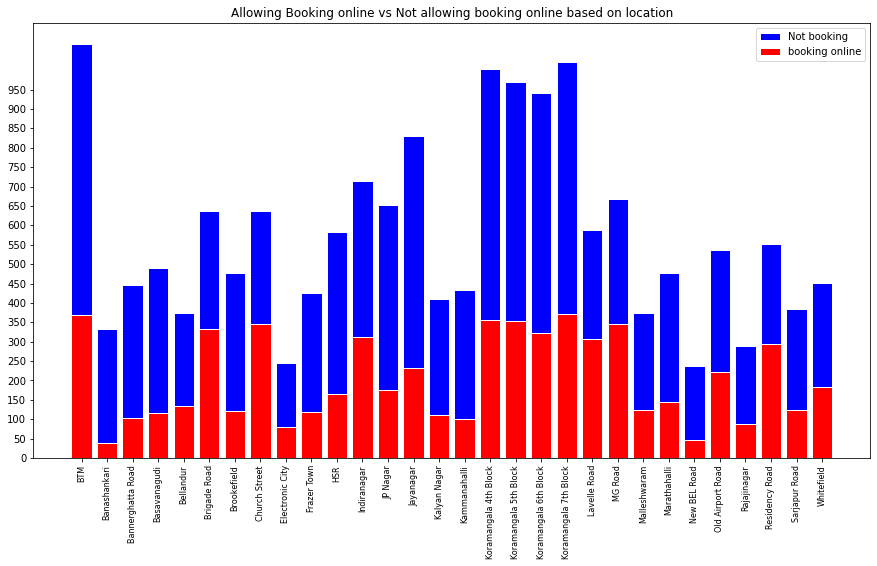

In [39]:
#Plotting both the chart in a single bar plot 
plt.figure(figsize=(15,8))
#First plotting the dominant data
plt.bar(city,not_booked["book_table"] , color='b',edgecolor='white', label='Not booking')
#plotting data which has fewer qunatities to check the overlap
plt.bar(city,booked["book_table"] , color='r',edgecolor='white', label='booking online')

plt.xticks(city,rotation="vertical", size=8)
plt.yticks(np.arange(0,1000,50))
plt.legend()
plt.title("Allowing Booking online vs Not allowing booking online based on location")
plt.show()

OBSERVATION-

            1. In BTM and entire Koramangla block where most of the restaurents are situated the ratio of 
            restaurents allowing table booking and restaurents not allowing is almost-30:70
            2. Even in rest of the locations, the ratio is almost same 
            3. Hence it can be assumed that tendency of table booking among customers is very less in numbers 
            4. Restaurents are not even allowing table booking so that to maintain huge rush of customers and may 
               be for total profit issue

#### QS 3. Which city is ahead in terms of most number of restaurents?

In [40]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Count of restaurents in each city


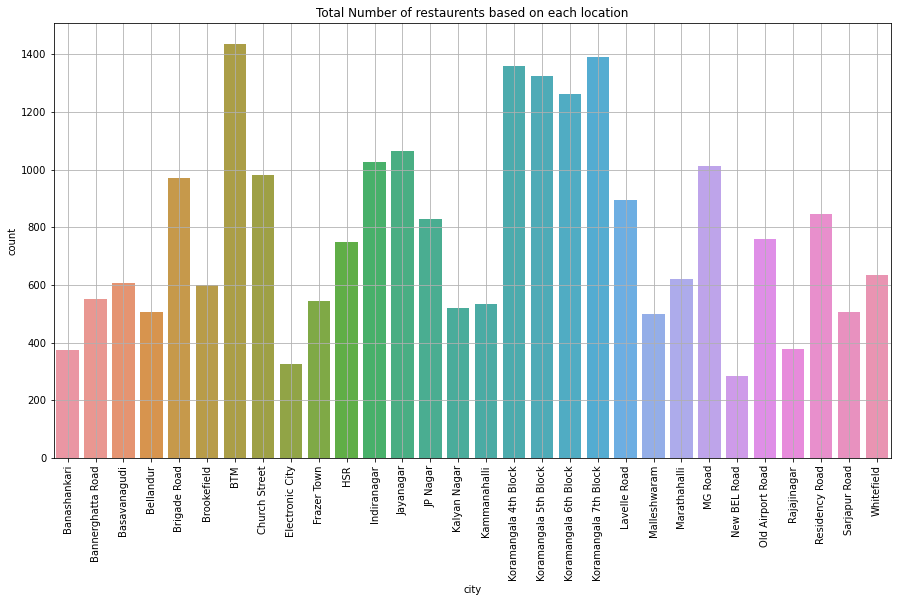

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(zomato.city).set_xticklabels(sns.countplot(zomato["city"]).get_xticklabels(),rotation=90)
plt.title("Total Number of restaurents based on each location")
plt.grid()
plt.show()
#countplot sums up the total number of non zero values based on any condition

OBSERVATION:

            1. As per individual location, in BTM maximum number of locations are there with total count of more 
               than 1400.
            2. By looking at the plot it can be seen that comprised of 4 blocks in Koramangla, total restaurent
               counts are way more superior than any location
            3. New BEL road and Electronic city is having the least number of restaurents 

#### QS 4. Does user's rating get affected due to different location?

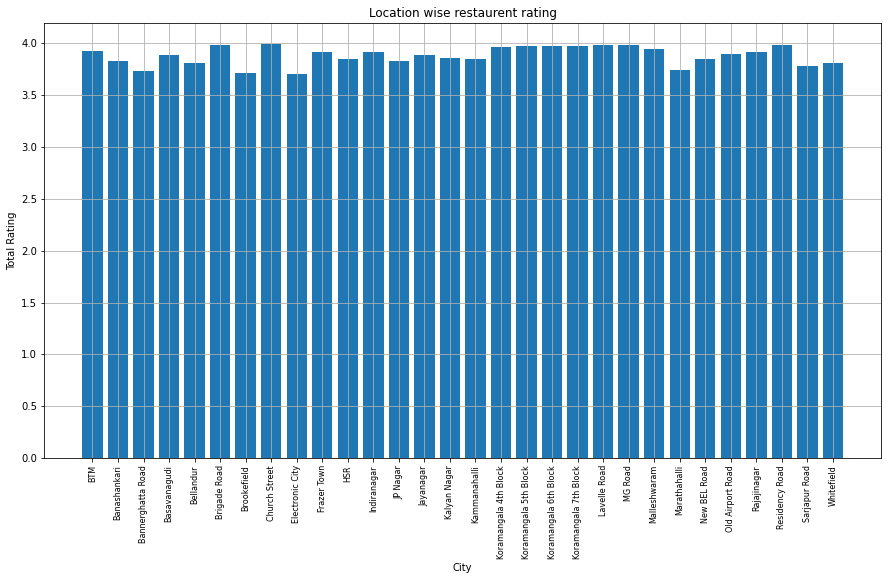

In [42]:
#creating series with the mean rating value of all restaurents based on each location
rating=zomato.groupby("city")["rate"].agg(np.mean)
plt.figure(figsize=(15,8))
plt.bar(city,rating)
plt.grid()
plt.xlabel("City")
plt.ylabel("Total Rating")
plt.title("Location wise restaurent rating")
plt.xticks(city,rotation="vertical", size=8)

plt.show()

OBSERVATION: 

            1. Rating is not such affected based on any location category. As all the locations are having more or
               less average rating with difference of 1 standard deviation-2 srtandard deviation.
            

#### QS 5. How many common restaurent types are there around the city? Which types are having maximum counts and which are                    the least?

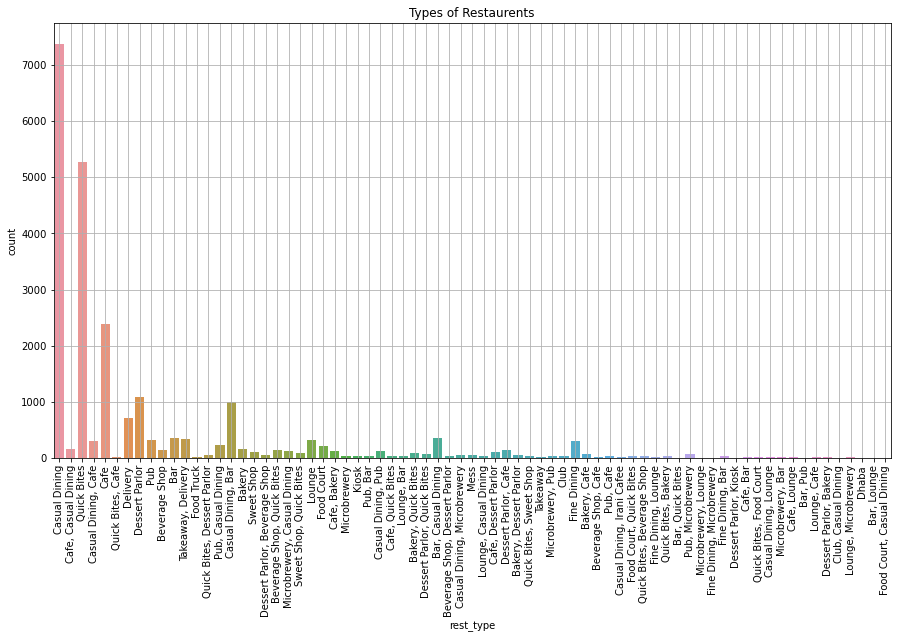

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(zomato.rest_type).set_xticklabels(sns.countplot(zomato["rest_type"]).get_xticklabels(),rotation=90)
plt.title("Types of Restaurents")
plt.grid()
plt.show()

OBSERVATION:

            1. Two restaurent type is dominant here i.e Casual dining and Quick Bites
            2. Most of the customer's prefer casual dining as it is simple, family-friendly and somewhat cheaper 
               most of the times 
            3. Quick Bites type of restaurents also knows as QSR(quick service restaurent) are famous for 
               its fast food cuisine with minimal table services. Normally people prefer these type of restaurents
               during busy hours or having foods in cheaper rate. Obviously for schhol/college students and also
               for working professionals these type of restaurents are normally remain high in demand list 
               specially during working hours 

#### QS 6.  What is the normal tendency of user's rating?

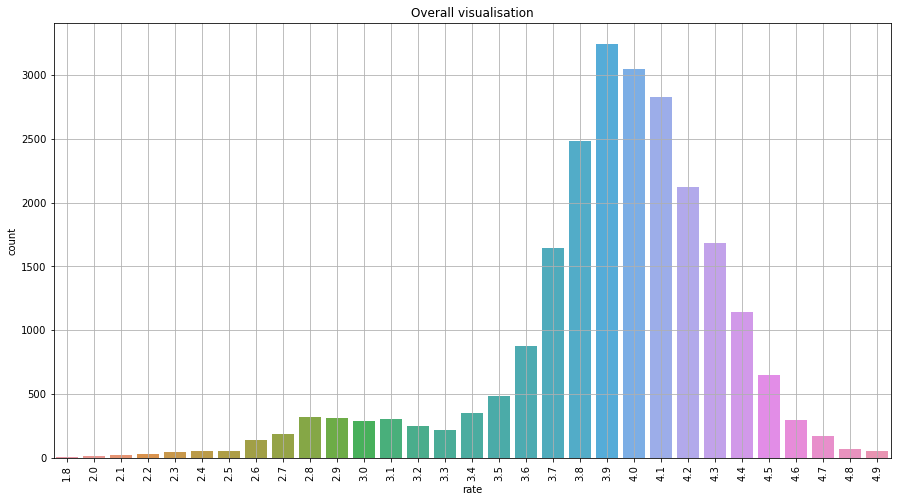

In [44]:
#Here we are counting total ratings based on user's rating chart
plt.figure(figsize=(15,8))
sns.countplot(zomato.rate).set_xticklabels(sns.countplot(zomato["rate"]).get_xticklabels(),rotation=90)
plt.title("Overall visualisation")
plt.grid()
plt.show()

OBSERVATION:

            1. The most common rating given by users is 3.9 which has count more than 3500 follwed by 4 and 4.1
            2. Very few restaurents are having lesser than 2.8 counts and greater than 4.6 count
            3. Hence majority of restaurents are having average to good ratings. very few restaurents got 
               excellent rating  

#### QS 7. Does user's rating depend on different restaurent types?


Ideology-
            
            1. To answer this question let's make a series with mean value of rating based on each restaurent type 
            2. After creating the series, we will plot bar chart with this series to check which type of
               restaurents are having high mean rating
            3. To find out restaurent based data, we are using groupby on on restaurent type

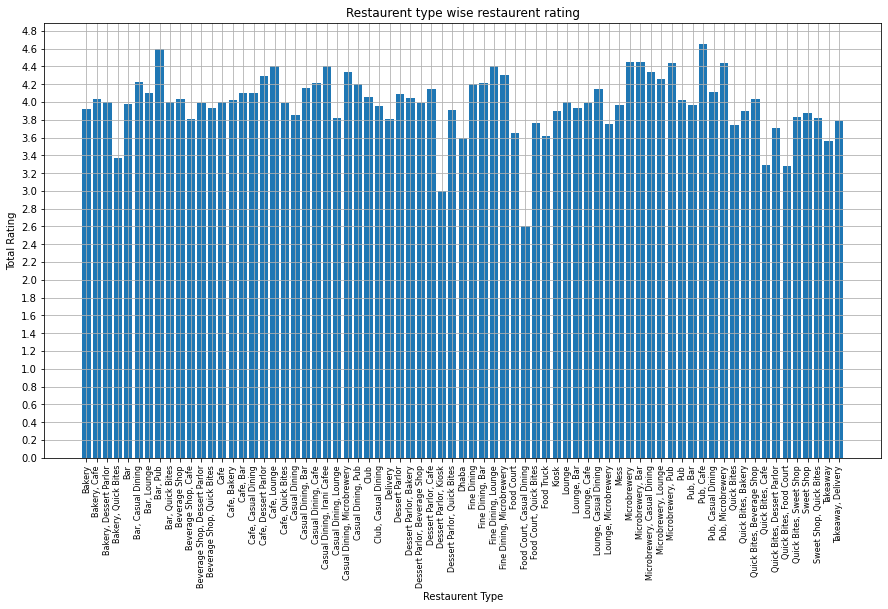

In [45]:
#creating series with mean value of rating based on restaurent type
rating=zomato.groupby("rest_type")["rate"].agg(np.mean)
#creating series with restaurent type name 
rest_type=[rest[0] for rest in zomato.groupby("rest_type")]
plt.figure(figsize=(15,8))
plt.bar(rest_type,rating)
plt.xlabel("Restaurent Type")
plt.ylabel("Total Rating")
plt.grid()
plt.title("Restaurent type wise restaurent rating")
plt.xticks(rest_type,rotation="vertical", size=8)
plt.yticks(np.arange(0,5,0.2))

plt.show()




OBSERVATION-

            1. Highest rating was observed for the category namely Pub,Cafe follwed by Bar, Pub
            
            2. The reason may be due to well decorated ambiance and service. In such type of restaurents special
            attention is normally given towards decoration & services. People usually visit those type of places
            to spend some quality time and naturally these factors like ambiance, service, features etc are highly 
            observed by the customeer's and accordingly rating is given. Normally these are premium places and 
            obviously rating must be on higher side 
            
            3. Worst rating is observed for food courts followed by Dessert parlour, Kiosk. The reason may be due 
            to very poor service,open/no proper ambiance, gathering of lot of people which causes unhealthy
            envioronment etc.

#### QS 8.   How costing depends on different types of restaurent?

Ideology-

        1. To answer this question let's make a series with mean value of cost based on each restaurent type 
        2. After creating the series, we will plot bar chart with this series to check which type of
           restaurents are having high mean costing
        3. To find out restaurent based data, we are using groupby on on restaurent type

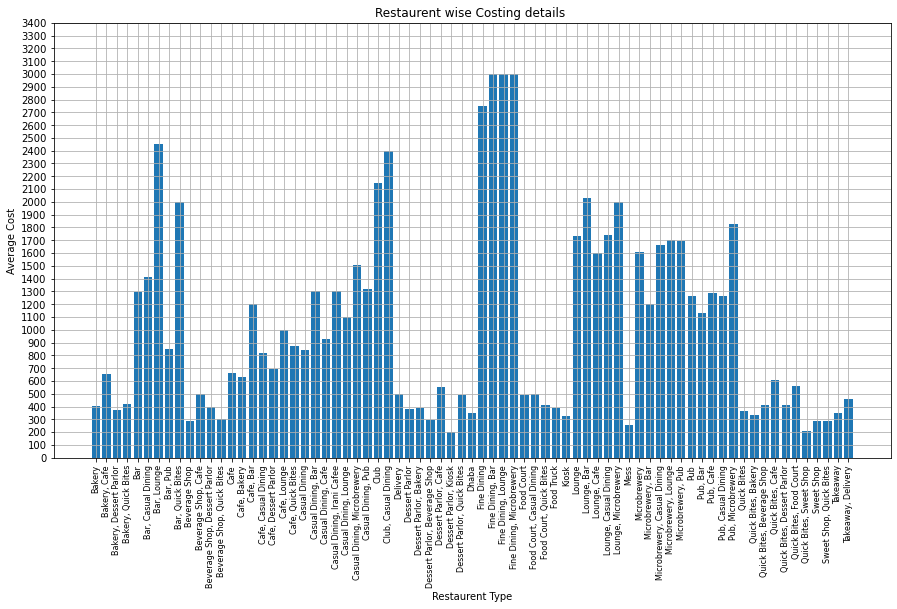

In [46]:
#creating series of mean values of costing depending on different restaurent type
costing=zomato.groupby("rest_type")["cost"].agg(np.mean)
plt.figure(figsize=(15,8))
plt.bar(rest_type,costing)
plt.xlabel("Restaurent Type")
plt.ylabel("Average Cost")
plt.grid()
plt.title("Restaurent wise Costing details ")
plt.xticks(rest_type,rotation="vertical", size=8)
plt.yticks(np.arange(0,3500,100))

plt.show()


OBSERVATION-

            1. Costing for Fine dining with bar and lounge is maximum. This is because these type of restuarents 
            cum Bars are the main attraction point of any locality and they are mainly developed for upper income
            group people.Fine dining restaurent type is holding second poistion. The reason is same 
   
            2. Lowest prices are observed in Kiosk followed by Quick bites-Sweet shop, Beverage shop and Quick 
            bites. These are mainly snacks counter and available in road side area. Obviously price is charged for
            food only. In most of the shops even GST is not levied. Hence overall costing becomes consideraby low
            
            3. Average price is observed for most promising type i.e Casual dinings. The main motive behind keeping
            such price is to attract all sort of people starting from LIG to upper class where they can enjoy good 
            food with not so much great detail on ambiance, service etc.

#### QS 9.   How user's rating varies with costing?

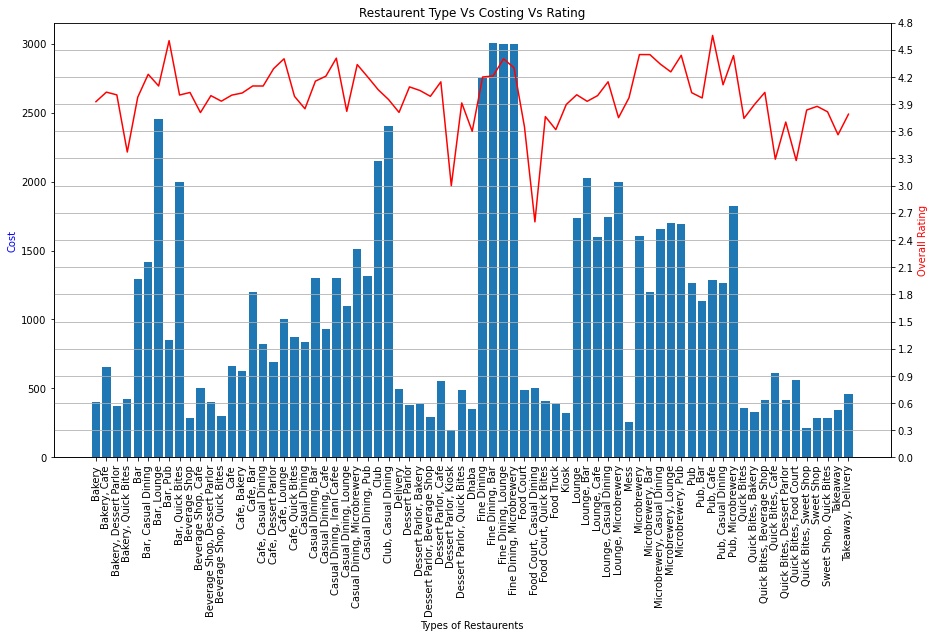

In [47]:
#Here 3 parameter is merged together to check how those parameters are interlinked with each other 
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title("Restaurent Type Vs Costing Vs Rating")
ax2 = ax1.twinx()
ax1.bar(rest_type,costing)
ax2.plot(rest_type,rating, 'r-')
plt.grid()
ax1.set_xlabel('Types of Restaurents')
ax1.set_xticklabels(rest_type,rotation="vertical")
ax1.set_ylabel('Cost', color='b')
ax2.set_ylabel('Overall Rating', color='r')
ax2.set_yticks(np.arange(0,5,0.3))
plt.show()

OBSERVATION-

            1.Highest mean rating was observed for Pub,cafe followed by Bar, Pub. In both the case the costing
            is not too much high. Infact for Bar, Pub category the price is just above 750/- which is decent enough
            .Lesser price can be deciding factor for high rating. Apart from that usually authority maintains
            better ambiance and service with nice music setup which can be a very highlighying point for good 
            rating.
            
            2. Though price is on lower side but still in food court counter,kiosk people only focus on quantity 
            and quality of food. That is the only deciding factor for this category. It can be understood that for 
            suchcategory, expectation of users are not meeting with actual and hence received worst rating . 
            
            3. Decent rating is observed for all kinds of casual dining

#### 10. What is generally user's preference for spending to have lunch/dinner around the city?

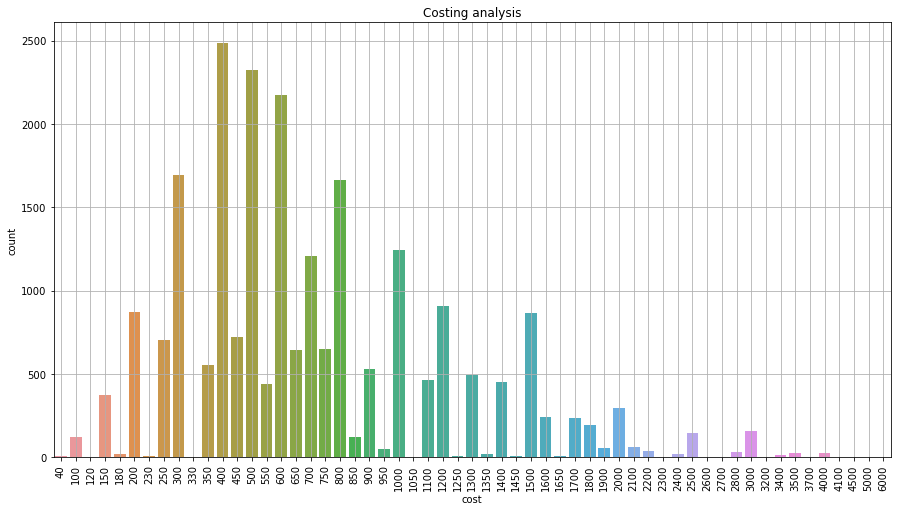

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(zomato.cost).set_xticklabels(sns.countplot(zomato["cost"]).get_xticklabels(),rotation=90)
plt.title("Costing analysis")
plt.grid()
plt.show()

OBSERVATION-

            1. As majority of people prefer a lower-middle range to fulfil normal lunch/dinner on regular basis,
            same picture is observed here as well. Majority of customers are spending 400-800/- on average.
            
            2.There is very low percentage of people spendnig more than 1500/- and lesser than 200 which is obvious
            as very few items are available in lesser than 200/- and for regular basis there are hardly few people
            who spends more than 2000-3000.

#### 11. Find out most number of outlets of a particular restaurent

In [49]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [62]:
#we are storing values of number of outlets of top 30 restaurents 
top_30=zomato.name.value_counts()[:30]


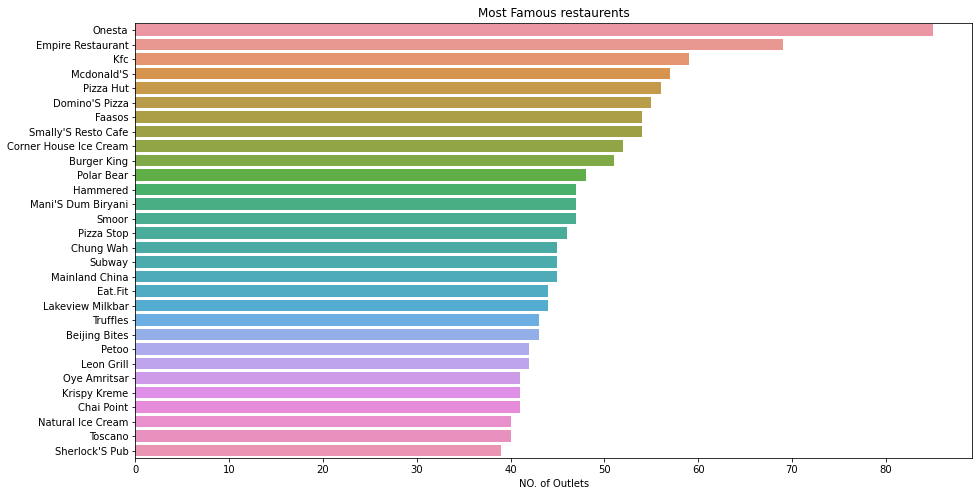

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(top_30,top_30.index)#index function calls the name or index name of concern value
plt.title("Most Famous restaurents")
plt.xlabel("NO. of Outlets")
plt.show()

OBSERVATION-

            1. Most famous restaurent is onesta which is having more than 80 branches or outlets followed by
            Empire Restaurent which is having around 70 branches
            2. Onesta restaurent belongs to casual dining and cafe type. As per previous charts, we can observe
            that casual dining restaurents are comparatively cheaper in price and also liked by users in terms
            of rating. This may be one important reason for the group company of Onesta to increase their number
            of outlets
            2. The reason is same as for Empire Restaurent as well. It also belongs to Casual dining category 
            

### Summarisation:

                    1. Online order facility is must have for any new upcoming restaurent 
                    
                    2. Table booking facility can be skipped as it may create problem during peak hours 
                    
                    3. BTM and entire Koramangla these two places are having maximum number of restaurents
                    Hence it can be said that to open a new restaurant in this two area can create lot of tough 
                    comepetetion. But also if properly marketting is done then high amount of revenue can be 
                    developed as customers are prefering this two locations mainly
                    
                    4. Very less competetion in terms of opening a new restaurent can be observed in New BEL road 
                    and Electronic city
                    
                    5. In terms of opening a new restaurant, company may think to open casual dining type 
                    restaurent if investment amount is lower to middle range. If the investment amount is 
                    low ,Company may also think about opening small Quick Bites type cafe which has high demand 
                    among local customers. As demand is directly proportional to revenue, One can get good amount 
                    of revenue with very initial investement by maintaining proper quality and quantity
                    
                    6. User rating for casual dining type restaurents are decent enough. But for Bar, Pub and 
                    premium places the rating is normally on higher side. For kiosk, food court rating is very low 
                    7. Costing for overall items must be kept in the range of 400-800/- as most of the customers 
                    are prefering this price range. It may attract customers and can generate high revenues 
                    
                    